In [ ]:
%matplotlib notebook

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import warnings


In [2]:
airport_csv = ("Data/final_dataset.csv")
airport_data_df = pd.read_csv(airport_csv)
airport_data_df.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0


In [3]:
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]


airport_data_df['delay_sum'] = airport_data_df[col_list].sum(axis=1)
airport_data_df.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted,delay_sum
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0,2.99
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0,3.00
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0,20.00
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0,25.99
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0,1.00


In [4]:
airport_groups = airport_data_df.groupby(['airport_name'])['delay_sum']
airport_delays = airport_groups.sum()

airport_df = airport_delays.reset_index()
airport_df.head()

,airport_name,delay_sum
0,Aberdeen Regional Airport,112.01
1,Abilene Regional Airport,498.96
2,Abraham Lincoln Capital Airport,464.05
3,Adak Airport,16.00
4,Akron-Canton Airport,2054.05


In [5]:
sorted_airport_df = airport_df.sort_values('delay_sum', ascending=False)

Top25_delay_df = sorted_airport_df.nlargest(25, 'delay_sum')
Top25_delay_df.reset_index()

,index,airport_name,delay_sum
0,63,Chicago O'hare International Airport,92928.02
1,77,Dallas/Fort Worth International Airport,76313.98
2,15,Atlanta International Airport,65842.93
3,84,Denver International Airport,54852.87
4,169,La Guardia Airport,54431.98
5,283,San Francisco International Airport,51288.01
6,221,Newark Liberty International Airport,48368.06
7,57,Charlotte/Douglas International Airport,46262.06
8,185,Los Angeles International Airport,46203.03
9,44,Bush Intercontinental Airport,43761.98


Text(0.5, 1.0, 'Total Delayed Flights by Airport (09/2018-09/2019)')

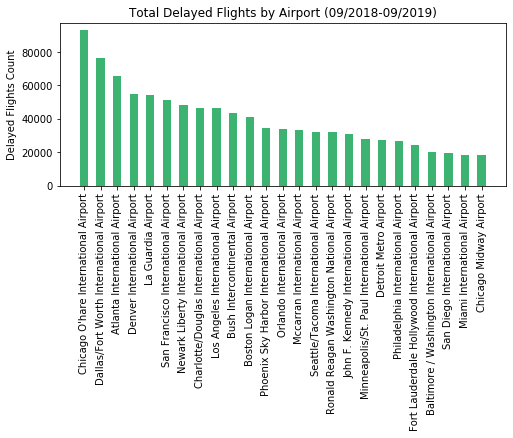

In [25]:
fig, ax = plt.subplots(figsize=(8,3))

x_axis = Top25_delay_df["airport_name"]
y_axis = Top25_delay_df["delay_sum"]

plt.bar(x_axis, y_axis,color="mediumseagreen", align="center", width=.5)
#plt.plot(x_axis, y_axis,'-o',color="orange")
plt.xticks(rotation=90)

ax.set_ylabel('Delayed Flights Count')
ax.set_title('Total Delayed Flights by Airport (09/2018-09/2019)')

#Save fig
#plt.savefig("Project-1-FlightAnalysis/Delayed_Flights_Tot_Airport.png")

In [7]:
#clean_df = airport_data_df.drop(["air_carrier_delay","weather_delay","national_aviation_system_delay",
#                              "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted","carrier_name","delay%"], axis=1)
#clean_df.head()

In [8]:
airport_data_df.columns

Index(['year', 'month', 'carrier_name', 'airport_abbr', 'airport_name', 'city',
       'state', 'total_number_flights', 'air_carrier_delay', 'weather_delay',
       'national_aviation_system_delay', 'sercurity_delay',
       'aircraft_arriving_late', 'flight_cancelled', 'flight_diverted',
       'delay_sum'],
      dtype='object')

In [11]:
# Dataframe of sum of flights by delay type
sum_rows = pd.DataFrame(airport_data_df.sum(axis=0))
# Remove not needed rowss
sum_rows = sum_rows.drop(['year', 'month', 'carrier_name', 'airport_abbr', 'airport_name', 'city',
       'state', 'total_number_flights', 'delay_sum'])
sum_rows = sum_rows.reset_index()
sum_rows = sum_rows.rename(columns = {'index':'delay_type'})

sum_rows

,delay_type,0
0,air_carrier_delay,407870
1,weather_delay,51321.9
2,national_aviation_system_delay,479101
3,sercurity_delay,2767.63
4,aircraft_arriving_late,539121
5,flight_cancelled,144861
6,flight_diverted,20535


In [33]:
airport_data_df['delay%'] = airport_data_df['delay_sum']*%
airport_data_df.head()

SyntaxError: invalid syntax (<ipython-input-33-133831f6ac77>, line 1)